In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df14_15 = pd.read_csv('GDAX.BTC-USD_140101_150101.csv', sep=',')

In [3]:
df = df14_15
l = len(df)
print(l)

27


In [4]:
df15_16 = pd.read_csv('GDAX.BTC-USD_150101_160101.csv', sep=',')
rename_dic = dict(zip(df15_16.index, 
                     [i + l for i in range(len(df15_16))]))
df15_16.rename(index=rename_dic, inplace=True)

In [5]:
df = df.append(df15_16)
l = len(df)
print(l)

441646


In [6]:
df16_17 = pd.read_csv('GDAX.BTC-USD_160101_170101.csv', sep=',')

rename_dic = dict(zip(df16_17.index, 
                     [i + l for i in range(len(df16_17))]))
df16_17.rename(index=rename_dic, inplace=True)

In [7]:
df = df.append(df16_17)
l = len(df)
print(l)

944616


In [8]:
df17_18 = pd.read_csv('GDAX.BTC-USD_170101_180101.csv', sep=',')

rename_dic = dict(zip(df17_18.index, 
                     [i + l for i in range(len(df17_18))]))
df17_18.rename(index=rename_dic, inplace=True)

In [9]:
df = df.append(df17_18)
l = len(df)
print(l)

1426728


In [10]:
df18_19 = pd.read_csv('GDAX.BTC-USD_180101_190101.csv', sep=',')
rename_dic = dict(zip(df18_19.index, 
                     [i + l for i in range(len(df18_19))]))
df18_19.rename(index=rename_dic, inplace=True)

In [11]:
df = df.append(df18_19)
l = len(df)
print(l)

1951822


In [12]:
rename_dic = dict(zip(df.columns, 
                      ['ticks', 'per', 'date', 'time',
                       'open', 'high', 'low', 'close',
                       'vol']))
df.rename(columns=rename_dic, inplace=True)
df.columns

Index(['ticks', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'vol'], dtype='object')

In [13]:
usd = 1000
bitcoin = 0

In [14]:
k = np.array([2**i for i in range(2,17)])

In [15]:
y = [df.open[0]]*len(k)
for index, i in enumerate(k):
    df.open[int(100000-i):100000]

In [16]:
results = [[usd, bitcoin] for i in range(len(k))]
all_j = [[1000 for j in range(len(df.open))] for i in range(len(k))]
all_ = [1000 for j in range(len(df.open))]
result = [[usd, bitcoin] for i in range(len(df.open))]

In [17]:
for j in range(100001, len(df.open)):
    max_index = 0
    for i in range(len(k)):
        y[i] = (y[i]*k[i] - df.open[j-k[i] if j > k[i] else 0] + df.open[j])/k[i]
        dif = df.open[j] - y[i]
        
        a = results[i][0]+results[i][1]*df.open[j]
        all_j[i][j] =a
        if ((all_j[max_index][j] - all_j[max_index][j-1])/all_j[max_index][j-1] < (all_j[i][j] - all_j[i][j-1])/all_j[i][j-1]):
            max_index = i
        k1 = 1 if dif > 0 else 0
        results[i][0] = a*(1-k1)
        results[i][1] = a*k1/df.open[j]
        
    y[max_index] = (y[max_index]*k[max_index] - df.open[j-k[max_index] if j > k[max_index] else 0] + df.open[j])/k[max_index]
    dif = df.open[j] - y[max_index]
    
    a = result[j-1][0]+result[j-1][1]*df.open[j]
    all_[j] = a
    
    k1 = 1 if dif > 0 else 0
    result[j][0] = a*(1-k1)
    result[j][1] = a*k1/df.open[j]
    
    if j%10000 == 0:
        print(j//10000)

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195


In [18]:
c = ['orange', 'yellow', 'black', 'blue', 'green', 'gray', 'red', 'violet', 'tan', 'lime', 'darkblue', 'pink', 'aqua', 'gold', 'darkred']

In [19]:
all_3 = all_j

In [20]:
all_3_bitcoin = [None]*len(k)

In [21]:
k[[4,8,9]]

array([  64, 1024, 2048])

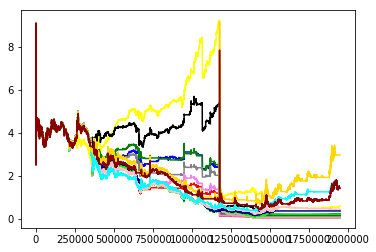

In [29]:
for i in range(len(k))[1:]:
    all_3_bitcoin = all_3[i]/df.open
    plt.plot(list(range(len(all_3[i]))), all_3_bitcoin, color = c[i])

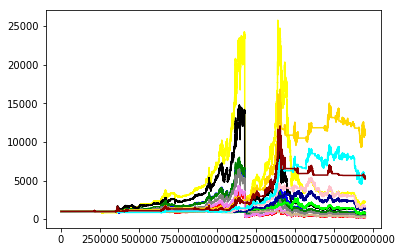

In [30]:
for i in range(len(k))[1:]:
    plt.plot(list(range(len(all_3[i]))), all_3[i], color = c[i])

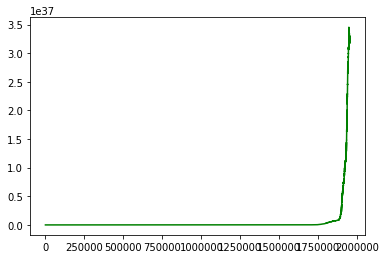

In [24]:
plt.plot(list(range(len(all_))), all_, color = "green")

In [ ]:
all_3_log = list(map(lambda a : math.log(a), all_3[i]))
plt.plot(list(range(len(all_3[i]))), all_3_log, color = c[i])

In [23]:
all_3[0][-1]

9.595229330174086e-09

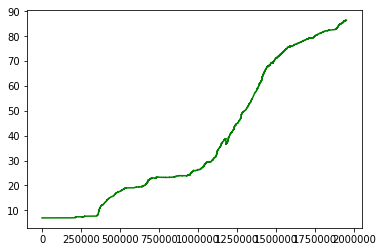

In [25]:
plt.plot(list(range(len(all_))), list(map(lambda a : math.log(a), all_)), color = "green")

In [51]:
result

[[1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [1000, 0],
 [10

In [30]:
list(map(lambda a : a[-1], all_3))

[1000.0,
 905.0488453103892,
 847.8211126175098,
 668.6144428230434,
 594.4626926081095,
 547.325609754808,
 751.5814340416911,
 703.7723792993272,
 824.2406418927709,
 1057.1986885434997,
 1622.7129806776434,
 2527.429952457118,
 4900.742261407813,
 7249.149628182869,
 5063.072965987659]

In [52]:
d = list(map(lambda a : 1 if a[1] == 0 else 0, result))

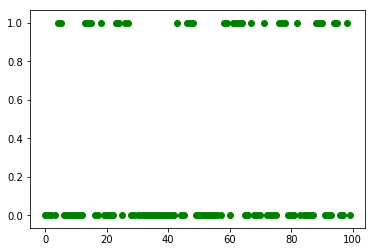

In [57]:
plt.scatter(list(range(len(all_[-100:]))), d[-100:], color = "green")

In [59]:
all_[-10:]

[1.8147881071587026e+28,
 1.8147881071587026e+28,
 1.815085797412116e+28,
 1.815085797412116e+28,
 1.8150760370759384e+28,
 1.8150760370759384e+28,
 1.8150760370759384e+28,
 1.8163148669892725e+28,
 1.8159100524900332e+28,
 1.8159100524900332e+28]

In [60]:
df.open[-10:]

1951812    3718.50
1951813    3718.70
1951814    3719.31
1951815    3719.31
1951816    3719.29
1951817    3718.94
1951818    3721.49
1951819    3724.03
1951820    3723.20
1951821    3724.04
Name: open, dtype: float64

In [61]:
result[-10:]

[[1.8147881071587026e+28, 0.0],
 [0.0, 4.880168088737201e+24],
 [0.0, 4.880168088737201e+24],
 [0.0, 4.880168088737201e+24],
 [1.8150760370759384e+28, 0.0],
 [1.8150760370759384e+28, 0.0],
 [0.0, 4.877283123361714e+24],
 [0.0, 4.877283123361714e+24],
 [1.8159100524900332e+28, 0.0],
 [0.0, 4.876182996127951e+24]]

In [26]:
d = list(map(lambda i : (all_[i] - all_[i-24*30*60])*100/all_[i-24*30*60], range(24*30*60, len(all_))))

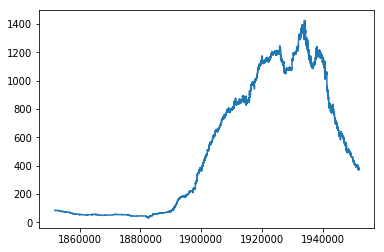

In [28]:
plt.plot(list(range(24*30*60, len(all_)))[-100000:], d[-100000:])